In [22]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import math

In [23]:
data_type = 'genie'
nu_type ="NuE"
int_type = 1
folder = '9' 
files = '1'

n_files = 10
i3_per_npz = 10 # 10 for NuE1 and NuMu1, 100 otherwise

#name = nu_type+'_'+str(int_type)+'_'+str(folder)#+'_'+str(files)+'?_'
name = nu_type+'_'+str(int_type)#+'_'#+str(folder)+'_'+str(files)
name2 = nu_type+'_'+str(int_type)#+'_'#+str(folder)#+'_'+str(files)

print(name)

N_PRIM_CHILDREN = 3 
STRINGS_TO_SAVE = 10
N_Y_BINS = 60
N_X_BINS = 500
N_CHANNELS = 3

DEFAULT_INDEX = 2.88
DEFAULT_PHI = 2.1467

NuE_1


In [18]:
st_info_dtype = np.dtype(
    [     
        ('q', np.float32),
        ('num', np.uint32),
        ('dist', np.float32)
    ]
)
st_info_dtype = np.dtype(
    [
        ('q', np.float32),
        ('num', np.uint32),
        ('dist', np.float32)
    ]
)
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
particle_dtype = np.dtype(
    [
        ("tree_id", np.uint32,(2)),
        ("pdg", np.int32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
veto_dtype = np.dtype(                                             
    [                                                                             
        ("SPE_rlogl", np.float32),                                                      
        ("Cascade_rlogl", np.float32),
        ("SPE_rlogl_noDC", np.float32),                                                   
        ("Cascade_rlogl_noDC", np.float32),                                              
        ("FirstHitZ", np.float32),
        ("VHESelfVetoVertexPosZ", np.float32),                                             
        ("LeastDistanceToPolygon_Veto", np.float32)
    ]
)

hese_dtype = np.dtype(                                             
    [                                                                             
        ("qtot", np.float32),
        ("vheselfveto", np.bool_),
        ("vheselfvetovertexpos", np.float32,(3)),
        ("vheselfvetovertextime", np.float32),
        ("llhratio", np.float32)
    ]
)
if data_type =='genie':
    WEIGHT_KEY = "I3MCWeightDict"
    weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32), 
        ('TotalColumnDepthCGS',np.float32), 
        ('MaxAzimuth',np.float32), 
        ('SelectionWeight',np.float32), 
        ('InIceNeutrinoEnergy',np.float32), 
        ('PowerLawIndex',np.float32), 
        ('TotalPrimaryWeight',np.float32), 
        ('PrimaryNeutrinoZenith',np.float32), 
        ('TotalWeight',np.float32), 
        ('PropagationWeight',np.float32), 
        ('NInIceNus',np.float32), 
        ('TrueActiveLengthBefore',np.float32), 
        ('TypeWeight',np.float32), 
        ('PrimaryNeutrinoType',np.float32), 
        ('RangeInMeter',np.float32), 
        ('BjorkenY',np.float32), 
        ('MinZenith',np.float32), 
        ('InIceNeutrinoType',np.float32), 
        ('CylinderRadius',np.float32), 
        ('BjorkenX',np.float32), 
        ('InteractionPositionWeight',np.float32), 
        ('RangeInMWE',np.float32), 
        ('InteractionColumnDepthCGS',np.float32), 
        ('CylinderHeight',np.float32), 
        ('MinAzimuth',np.float32), 
        ('TotalXsectionCGS',np.float32), 
        ('OneWeightPerType',np.float32), 
        ('ImpactParam',np.float32), 
        ('InteractionType',np.float32), 
        ('TrueActiveLengthAfter',np.float32), 
        ('MaxZenith',np.float32), 
        ('InteractionXsectionCGS',np.float32), 
        ('PrimaryNeutrinoEnergy',np.float32), 
        ('DirectionWeight',np.float32), 
        ('InjectionAreaCGS',np.float32), 
        ('MinEnergyLog',np.float32), 
        ('SolidAngle',np.float32), 
        ('LengthInVolume',np.float32), 
        ('NEvents',np.uint32), 
        ('OneWeight',np.float32), 
        ('MaxEnergyLog',np.float32), 
        ('InteractionWeight',np.float32), 
        ('EnergyLost',np.float32)
    ]
)

else: #if data_type =='corsika'
    WEIGHT_KEY = "CorsikaWeightMap"
    weight_dtype = np.dtype(
        [
            ("AreaSum" ,np.float32),
            ("Atmosphere",np.float32),
            ("CylinderLength",np.float32),
            ("CylinderRadius" ,np.float32),
            ("DiplopiaWeight",np.float32),
            ("EnergyPrimaryMax",np.float32),
            ("EnergyPrimaryMin",np.float32),
            ("FluxSum",np.float32),
            ("Multiplicity",np.float32),
            ("NEvents",np.float32),
            ("OldWeight",np.float32),
            ("OverSampling",np.float32),
            ("Polygonato",np.float32),
            ("PrimaryEnergy",np.float32),
            ("PrimarySpectralIndex",np.float32),
            ("PrimaryType",np.float32),
            ("ThetaMax",np.float32),
            ("ThetaMin" ,np.float32),
            ("TimeScale",np.float32),
            ("Weight",np.float32)
]                            
    )    
info_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)
save_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("pred", np.float32),
        ("pred_m", np.float32),
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)
train_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("vars", np.float32,(1,))
    ]
)


In [24]:
size = 0
print(len(glob.glob('/home/dup193/work/double_pulse/data/new_vars/Images_vars_'+name+'*')))
for file_name in glob.glob('/home/dup193/work/double_pulse/data/new_vars/Images_vars_'+name+'*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(size,file_name, len(x))
    new_file = []
    spl = file_name.split('/')
    size =size+1
    for n,e in enumerate(x):
        if (e['qst']['q'][0][0] >= 2000): #and ((e['logan_veto']["SPE_rlogl"]-e['logan_veto']["Cascade_rlogl"])>-0.5):
            y = np.zeros(1,dtype = train_dtype)
            hlc = e['map']['hlc']
            slc = e['map']['slc']
            logan_s = e['logan_veto']['SPE_rlogl']
            logan_c = e['logan_veto']['Cascade_rlogl']
            #moi = e['moi']/e['qtot']
            #qoth = e['qoth']
            #dist = np.sum(np.sqrt(e['qst_all']['dist']))
            #emin = e['ti'][0][0]
            er = e['ti'][0][1]
            e1 = e['ti'][0][2]
            e2 = e['ti'][0][3]
            #var = [hlc,slc,logan_s,logan_c,moi,qoth,dist,emin,er,e1,e2]
            #var = [hlc,slc,logan_s,logan_c,e1,e2]
            var = [logan_s-logan_c]
            
            use = True
            for i in var:            
                if math.isnan(i):
                    print("NaN",var)
                    use = False
            if use:
                y[["id","image","vars"]]=(e['id'],e['image'],var)
                new_file.append(y)
    new_file  = np.array(new_file)
    print("/home/dup193/work/double_pulse/data/new_vars/Qst2000/"+spl[-1][0:-9]+"_Qst2000.npz", len(new_file))   
    np.savez_compressed("/home/dup193/work/double_pulse/data/new_vars/Qst2000/"+spl[-1][0:-9]+"_Qst2000.npz", new_file)


1197
0 /home/dup193/work/double_pulse/data/new_vars/Images_vars_NuE_1_9_21_data.npz 4151
/home/dup193/work/double_pulse/data/new_vars/Qst2000/Images_vars_NuE_1_9_21_Qst2000.npz 2227
1 /home/dup193/work/double_pulse/data/new_vars/Images_vars_NuE_1_4_17_data.npz 4280
/home/dup193/work/double_pulse/data/new_vars/Qst2000/Images_vars_NuE_1_4_17_Qst2000.npz 2315
2 /home/dup193/work/double_pulse/data/new_vars/Images_vars_NuE_1_5_90_data.npz 4121
/home/dup193/work/double_pulse/data/new_vars/Qst2000/Images_vars_NuE_1_5_90_Qst2000.npz 2197
3 /home/dup193/work/double_pulse/data/new_vars/Images_vars_NuE_1_5_80_data.npz 4050
/home/dup193/work/double_pulse/data/new_vars/Qst2000/Images_vars_NuE_1_5_80_Qst2000.npz 2185
4 /home/dup193/work/double_pulse/data/new_vars/Images_vars_NuE_1_5_19_data.npz 4117
/home/dup193/work/double_pulse/data/new_vars/Qst2000/Images_vars_NuE_1_5_19_Qst2000.npz 2218
5 /home/dup193/work/double_pulse/data/new_vars/Images_vars_NuE_1_4_95_data.npz 4098
/home/dup193/work/double_p

In [22]:
f= np.load('/home/dup193/work/double_pulse/data/new_vars/Images_NuMu_1_2_40_data.npz')['arr_0']

In [ ]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name2+'.npy', mode = 'w+', dtype =save_2_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    y = np.zeros(x.shape[0],dtype = save_2_dtype)
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_4)/std_4
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    for n,e in enumerate(x):
        sums =[np.sum(e['image'][0,:,i,0]) for i in range(60)]
        max_dom = np.argmax(sums)
        #print( e['qst']['num'][0])
        im_sum = [-1,-1,-1]
        im_sum[0] = np.sum(e['image'][0,:,:,0])
        im_sum[1] = np.sum(e['image'][0,:,:,1])
        im_sum[2] = np.sum(e['image'][0,:,:,2])
        
        top_st = int(e['qst']['num'][0][0] in outer_strings)
        top3_st = sum([1 for i in e['qst']['num'][0] if i in outer_strings])
        top10_st = sum([1 for i in e['qst_all']['num'][0] if i in outer_strings])
        #print(top_st,top3_st,top10_st)
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2','n3','n4']] = (pred_n1[n],pred_n2[n],pred_n3[n],pred_n4[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        y[["id","dom","im_sum","out_st","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","primary_child_energy","primary_child_pdg",\
           "logan_veto","hese_old","hese","weight"]][n]=(e['id'],max_dom,im_sum, [top_st,top3_st,top10_st],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],\
                                                         e['prim_daughter'],e['primary_child_energy'],e['primary_child_pdg'],\
                                                         e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    #print(y['out_st'])
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)

In [5]:
# size = 0
# for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
#     new_file = []
#     x = np.load(file_name, mmap_mode="r")['arr_0']
#     print(file_name, len(x))
#     spl = file_name.split('_')
#     for e in x[:100]:
#         #print(e['qst']['q'][0][0],e['logan_veto']["SPE_rlogl"]-e['logan_veto']["Cascade_rlogl"])
#         #if (e['qst']['q'][0][0] >= 2000): #and ((e['logan_veto']["SPE_rlogl"]-e['logan_veto']["Cascade_rlogl"])>-0.5):
#         new_file.append(e['image'])
#     new_file  = np.array(new_file)
#     print(new_file.shape)
#     #print(new_file[0])
#     print("/home/dup193/work/double_pulse/data/NuMuCC_training/Charge_cut/Images_"+spl[3]+"_"+spl[4]+"_"+spl[5]+"_"+spl[6]+"_Simon.npz", len(new_file))   
#     np.savez_compressed("/home/dup193/work/double_pulse/data/Images_"+spl[3]+"_"+spl[4]+"_"+spl[5]+"_"+spl[6]+"_Simon.npz", new_file)


(100, 1, 500, 60, 3)


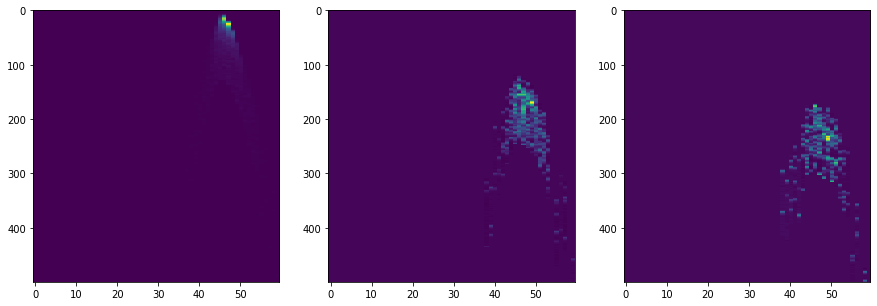

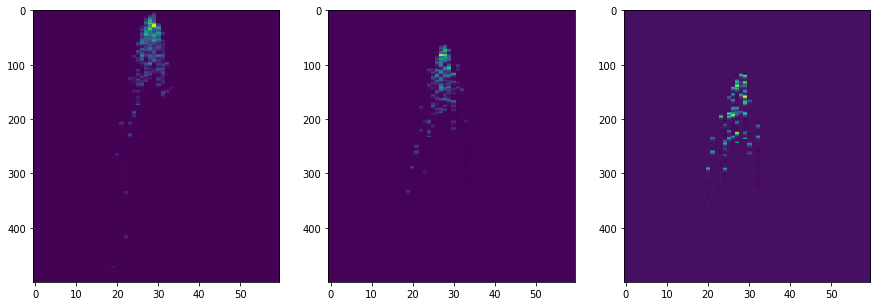

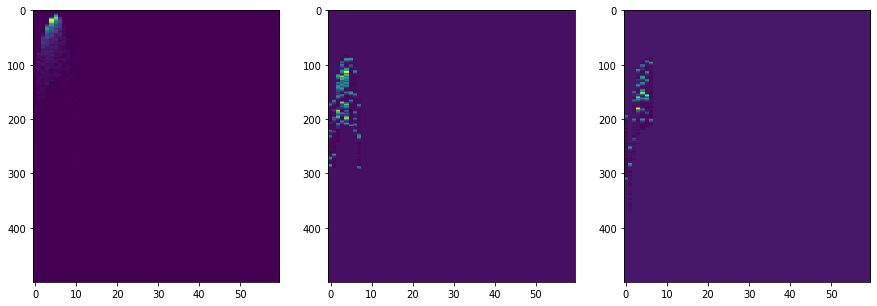

In [19]:
x = np.load('/home/dup193/work/double_pulse/data/Images_NuTau_1_1_1_Simon.npz', mmap_mode="r")['arr_0']
print(x.shape)
for i, im in enumerate(x[:3]):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(131)
    ax.imshow(im[0,:,:,0].reshape(500,60), interpolation='nearest', aspect='auto', cmap= 'viridis')
    ax1 = fig.add_subplot(132)
    ax1.imshow(im[0,:,:,1].reshape(500,60), interpolation='nearest', aspect='auto', cmap= 'viridis')
    ax2 = fig.add_subplot(133)
    ax2.imshow(im[0,:,:,2].reshape(500,60), interpolation='nearest', aspect='auto', cmap= 'viridis')
    

In [11]:
print(x.shape)

(100, 1, 500, 60, 3)


In [ ]:
size = 0
print(len(glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*')))
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    size += 1
    new_file = []
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(size, file_name, len(x))
    spl = file_name.split('/')
    for e in x:
        #print(e['qst']['q'][0][0],e['logan_veto']["SPE_rlogl"]-e['logan_veto']["Cascade_rlogl"])
        if (e['qst']['q'][0][0] >= 2000): #and ((e['logan_veto']["SPE_rlogl"]-e['logan_veto']["Cascade_rlogl"])>-0.5):
            new_file.append(e) 
    new_file  = np.array(new_file)
    print("/home/dup193/work/double_pulse/data/Qst2000/NuTau/"+spl[-1]+"_Qst2000.npz", len(new_file))   
    np.savez_compressed("/home/dup193/work/double_pulse/data/Qst2000/NuTau/"+spl[-1]+"_Qst2000.npz", new_file)


1321
1 /home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_8_98_data.npz 4751
/home/dup193/work/double_pulse/data/Qst2000/NuTau/Images_NuMu_1_8_98_data.npz_Qst2000.npz 1984
2 /home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_10_10_data.npz 4629
/home/dup193/work/double_pulse/data/Qst2000/NuTau/Images_NuMu_1_10_10_data.npz_Qst2000.npz 1912
3 /home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_5_28_data.npz 4624
/home/dup193/work/double_pulse/data/Qst2000/NuTau/Images_NuMu_1_5_28_data.npz_Qst2000.npz 1968
4 /home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_4_29_data.npz 4591
/home/dup193/work/double_pulse/data/Qst2000/NuTau/Images_NuMu_1_4_29_data.npz_Qst2000.npz 1905
5 /home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_2_81_data.npz 4515
/home/dup193/work/double_pulse/data/Qst2000/NuTau/Images_NuMu_1_2_81_data.npz_Qst2000.npz 1830
6 /home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_2_82_data.npz 4667
/home/dup193/work/do

In [49]:
x = np.load("/home/dup193/work/double_pulse/data/NuMuCC_training/Images_NuMu_1_8_81_Qst2000.npz")['arr_0'] 
weights = []
for n,e in enumerate(x):    #mean = np.mean(im)
    weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
    weights.append(weight_val)
weights = np.array(weights)

In [50]:
rate_x = np.sum(weights)
rate_x_err = np.sqrt(np.sum(np.square(weights)))
print("EGR =   {0:.3f} +/- {1:.3f}".format(rate_x,rate_x_err))

EGR =   8.592 +/- 0.842
